<a href="https://colab.research.google.com/github/SuvitKumar003/computer-Vision-Projects/blob/main/Feature_Matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [38]:
def display(img,cmap='gray'):
  fig=plt.figure(figsize=(12,10))
  ax=fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

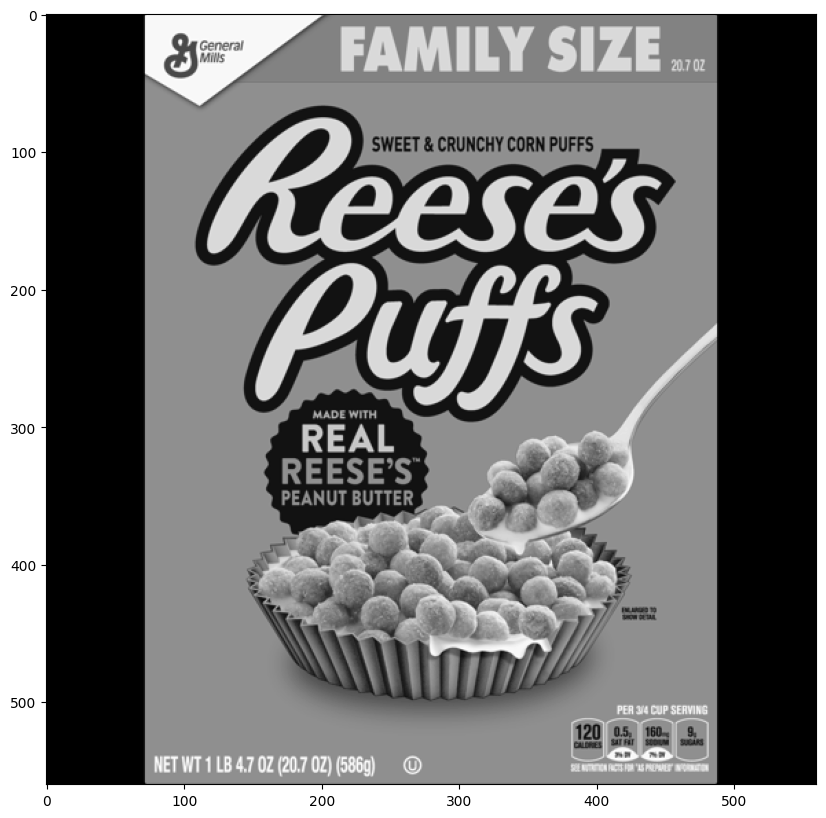

In [39]:
reeses =cv2.imread('/content/drive/MyDrive/Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/reeses_puffs.png',0)
display(reeses)


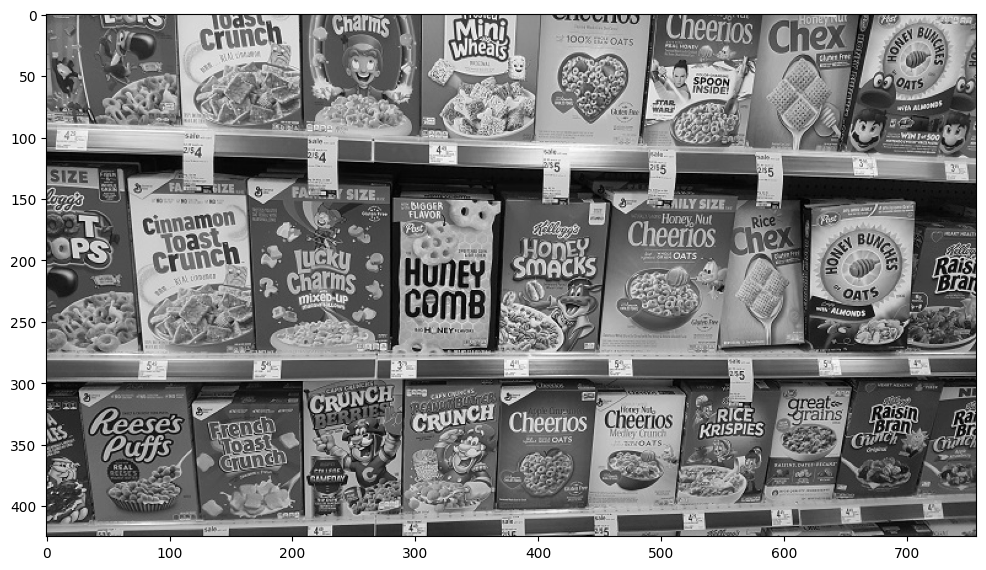

In [40]:
ceresls=cv2.imread('/content/drive/MyDrive/Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/many_cereals.jpg',0)
display(ceresls)

In [41]:
orb = cv2.ORB_create()

In [42]:
kp1,des1=orb.detectAndCompute(reeses,None)
kp2,des2=orb.detectAndCompute(ceresls,None)


In [43]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)


In [44]:
matches = bf.match(des1,des2)
single_match=matches[0]

In [45]:
single_match.distance

71.0

In [46]:
matches=sorted(matches,key=lambda x:x.distance)

In [47]:
reeses_matches=cv2.drawMatches(reeses,kp1,ceresls,kp2,matches[:25],None,flags=2)

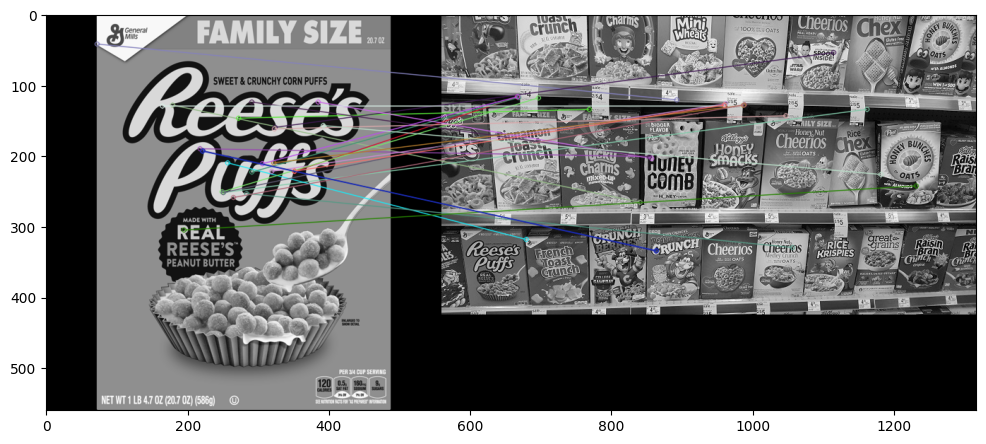

In [48]:
display(reeses_matches)

Brute force method has not provided us with a satisfactory result and in order to get good result we need complex algo for this

***SIFT-SCALE-INVARIANT FEATURE TRANSFORM***

In [49]:
sift = cv2.SIFT_create()


In [50]:
kp1,des1=sift.detectAndCompute(reeses,None)
kp2,des2=sift.detectAndCompute(ceresls,None)

In [51]:
bf  = cv2.BFMatcher()

In [52]:
matches = bf.knnMatch(des1,des2,k=2)

In [53]:
good = []
#ratio test less distance means a better match
for match1 , match2 in matches:
  if match1.distance<0.75*match2.distance:
    good.append([match1])

In [54]:
len(good)

79

In [55]:
len(matches)

1501

In [56]:
sift_matches=cv2.drawMatchesKnn(reeses,kp1,ceresls,kp2,good, None,flags=2)

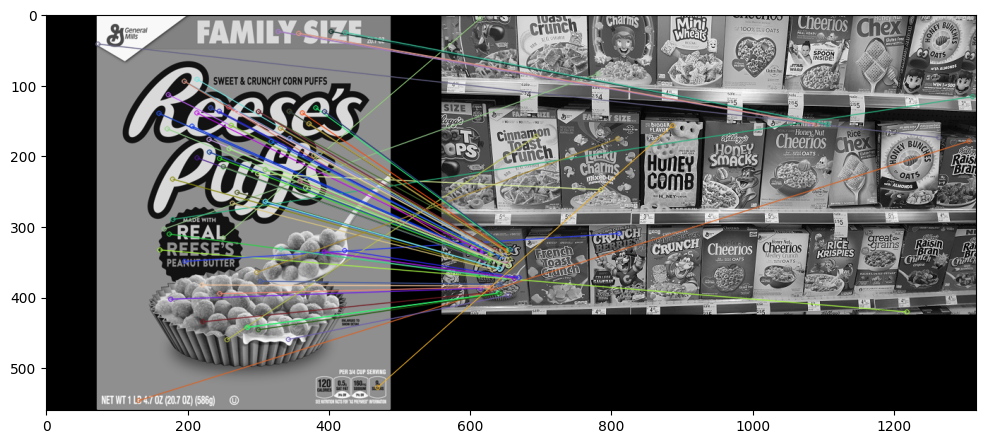

In [57]:
display(sift_matches)

In [58]:
matches

((< cv2.DMatch 0x7ba138b0f290>, < cv2.DMatch 0x7ba138b0ead0>),
 (< cv2.DMatch 0x7ba138b0f270>, < cv2.DMatch 0x7ba138b0f210>),
 (< cv2.DMatch 0x7ba138b0f250>, < cv2.DMatch 0x7ba138b0ef30>),
 (< cv2.DMatch 0x7ba138b0f2d0>, < cv2.DMatch 0x7ba138b0f1f0>),
 (< cv2.DMatch 0x7ba138b0f1d0>, < cv2.DMatch 0x7ba138b0f1b0>),
 (< cv2.DMatch 0x7ba138b0eef0>, < cv2.DMatch 0x7ba138b0ef70>),
 (< cv2.DMatch 0x7ba138b0f010>, < cv2.DMatch 0x7ba138b0ea50>),
 (< cv2.DMatch 0x7ba138b0f0b0>, < cv2.DMatch 0x7ba138b0f150>),
 (< cv2.DMatch 0x7ba138b0ec50>, < cv2.DMatch 0x7ba138b0f130>),
 (< cv2.DMatch 0x7ba138b0d570>, < cv2.DMatch 0x7ba138b0e970>),
 (< cv2.DMatch 0x7ba138b0edf0>, < cv2.DMatch 0x7ba138b0eb10>),
 (< cv2.DMatch 0x7ba138b0d9b0>, < cv2.DMatch 0x7ba138b0efd0>),
 (< cv2.DMatch 0x7ba138b0f110>, < cv2.DMatch 0x7ba138b0e9f0>),
 (< cv2.DMatch 0x7ba138b0da50>, < cv2.DMatch 0x7ba138b0d8d0>),
 (< cv2.DMatch 0x7ba138b0ee30>, < cv2.DMatch 0x7ba138b0e1b0>),
 (< cv2.DMatch 0x7ba138b0d7d0>, < cv2.DMatch 0x7ba138b0

In [59]:
sift=cv2.xfeatures2d.SIFT_create()

In [60]:
kp1,des1=sift.detectAndCompute(reeses,None)
kp2,des2=sift.detectAndCompute(ceresls,None)

***FLANN***

In [61]:
FLANN_INDEX_KDTREE=0
index_params=dict(algorithm=FLANN_INDEX_KDTREE,trees=5)
search_params=dict(checks=50)

In [62]:
flann=cv2.FlannBasedMatcher(index_params,search_params)

In [63]:
matches = flann.knnMatch(des1,des2,k=2)

In [64]:
matchesMask = [[0,0] for i in range(len(matches))]

In [65]:

for i,(match1,match2) in enumerate(matches):
  if match1.distance<0.75*match2.distance:
    matchesMask[i]=[1,0]
    #good.append([match1])

In [71]:
draw_params = dict(matchColor=(0,255,255),
                   singlePointColor=(255,0,0),
                   matchesMask=matchesMask,
                   flags=2)

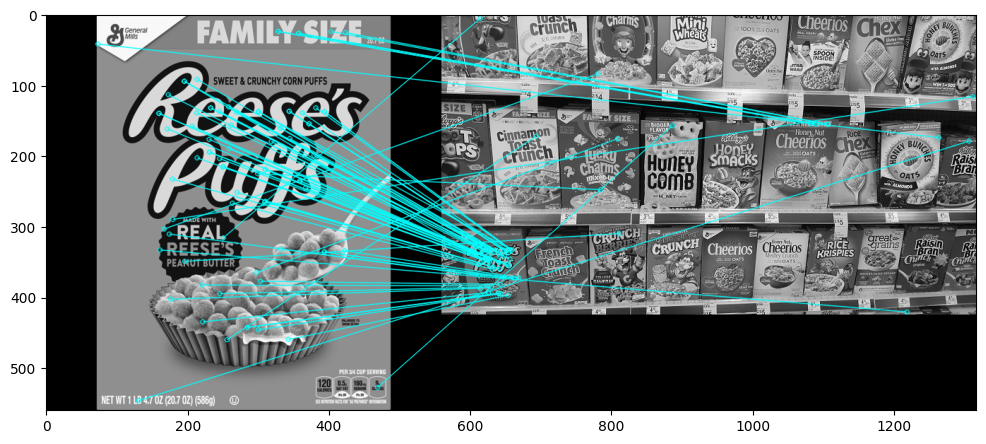

In [72]:
flann_matches =cv2.drawMatchesKnn(reeses,kp1,ceresls,kp2,matches,None,**draw_params)
display(flann_matches)